In [174]:
import os

for dirname, _, filenames in os.walk('/home/jupyter/mnt/datasets/NBaloT_BabyMonitor'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/jupyter/mnt/datasets/NBaloT_BabyMonitor/dataset/data_summary.csv
/home/jupyter/mnt/datasets/NBaloT_BabyMonitor/dataset/4.gafgyt.scan.csv
/home/jupyter/mnt/datasets/NBaloT_BabyMonitor/dataset/features.csv
/home/jupyter/mnt/datasets/NBaloT_BabyMonitor/dataset/4.gafgyt.junk.csv
/home/jupyter/mnt/datasets/NBaloT_BabyMonitor/dataset/README.md
/home/jupyter/mnt/datasets/NBaloT_BabyMonitor/dataset/device_info.csv
/home/jupyter/mnt/datasets/NBaloT_BabyMonitor/dataset/4.mirai.scan.csv
/home/jupyter/mnt/datasets/NBaloT_BabyMonitor/dataset/4.gafgyt.tcp.csv
/home/jupyter/mnt/datasets/NBaloT_BabyMonitor/dataset/4.gafgyt.udp.csv
/home/jupyter/mnt/datasets/NBaloT_BabyMonitor/dataset/4.mirai.udpplain.csv
/home/jupyter/mnt/datasets/NBaloT_BabyMonitor/dataset/4.mirai.udp.csv
/home/jupyter/mnt/datasets/NBaloT_BabyMonitor/dataset/4.gafgyt.combo.csv
/home/jupyter/mnt/datasets/NBaloT_BabyMonitor/dataset/4.mirai.ack.csv
/home/jupyter/mnt/datasets/NBaloT_BabyMonitor/dataset/4.benign.csv
/home/jupyter/mn

In [175]:
import pandas as pd

# чтение .csv файлов

file_path = '/home/jupyter/mnt/datasets/NBaloT_BabyMonitor/dataset/'

# проверка на корректность чтения
g_s = pd.read_csv(file_path + "4.gafgyt.scan.csv")
g_s.head(n=6)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000,1.000000,98.0000,0.000000,98.000000,0.000000e+00,0.000000e+00,0.0,1.000000,98.00000,0.000000,...,1.505913e+09,0.000000e+00,1.000000,1.505913e+09,0.000000e+00,1.000000,98.0000,0.000000,98.000000,0.000000e+00,0.000000e+00,0.0,1.000000,98.00000,0.000000,98.000000,0.000000e+00,0.0,0.0,1.000000,98.00000,0.000000,98.000000,0.000000,0.0,0.0,1.000000,98.000000,0.000000,98.000000,0.000000e+00,0.0,0.0,1.000000,98.00000,0.0,98.000000,0.000000e+00,0.0,0.0
1,1.027124,98.000000,1.818989e-12,1.114820,98.000000,1.818989e-12,1.486040,98.000000,0.000000,1.930395,98.000000,0.000000,1.992811,98.000000,0.000000,1.027124,98.000000,1.818989e-12,1.114820,98.000000,1.818989e-12,1.486040,98.000000,0.000000,1.930395,98.000000,0.000000,1.992811,98.000000,0.000000,1.027124,98.0000,0.000001,138.592929,1.818989e-12,0.000000e+00,0.0,1.114820,98.00000,0.000001,...,7.258066e+08,5.662062e+17,1.992811,7.502402e+08,5.669359e+17,1.027124,98.0000,0.000001,138.592929,1.818989e-12,0.000000e+00,0.0,1.114820,98.00000,0.000001,138.592929,1.818989e-12,0.0,0.0,1.486040,98.00000,0.000000,138.592929,0.000000,0.0,0.0,1.930395,98.000000,0.000002,138.592929,3.637979e-12,0.0,0.0,1.992811,98.00000,0.0,138.592929,0.000000e+00,0.0,0.0
2,1.029968,98.000000,0.000000e+00,1.133728,98.000000,3.637979e-12,1.732886,98.000000,0.000000,2.798650,98.000000,0.000000,2.978774,98.000000,0.000000,1.029968,98.000000,0.000000e+00,1.133728,98.000000,3.637979e-12,1.732886,98.000000,0.000000,2.798650,98.000000,0.000000,2.978774,98.000000,0.000000,1.029968,98.0000,0.000000,138.592929,3.637979e-12,3.279167e-31,0.0,1.133728,98.00000,0.000002,...,4.664649e+08,4.848660e+17,2.978774,4.983782e+08,5.021333e+17,1.029968,98.0000,0.000000,138.592929,3.637979e-12,3.279167e-31,0.0,1.133728,98.00000,0.000002,138.592929,4.067384e-12,0.0,0.0,1.732886,98.00000,0.000000,138.592929,0.000000,0.0,0.0,2.798650,98.000000,0.000000,138.592929,0.000000e+00,0.0,0.0,2.978774,98.00000,0.0,138.592929,5.456968e-12,0.0,0.0
3,1.338152,74.086423,1.933753e+02,1.581141,77.761456,2.380347e+02,2.386844,84.593174,249.275446,3.736997,89.436975,200.691398,3.972146,89.943902,192.894427,1.338152,74.086423,1.933753e+02,1.581141,77.761456,2.380347e+02,2.386844,84.593174,249.275446,3.736997,89.436975,200.691398,3.972146,89.943902,192.894427,1.000000,66.0000,0.000000,102.941731,0.000000e+00,0.000000e+00,0.0,1.000000,66.00000,0.000000,...,1.505913e+09,0.000000e+00,1.000000,1.505913e+09,0.000000e+00,1.000000,66.0000,0.000000,102.9417

In [176]:
# файлы с данными о "чистых" потоках
benign = pd.read_csv(file_path + "4.benign.csv")

# файлы с данными о потоках, зараженным ботнетом BASHLITE
g_j = pd.read_csv(file_path + "4.gafgyt.junk.csv")
g_t = pd.read_csv(file_path + "4.gafgyt.tcp.csv")
g_u = pd.read_csv(file_path + "4.gafgyt.udp.csv")
g_c = pd.read_csv(file_path + "4.gafgyt.combo.csv")

# файлы с данными о потоках, зараженным ботнетом Mirai
m_s = pd.read_csv(file_path + "4.mirai.scan.csv")
m_up = pd.read_csv(file_path + "4.mirai.udpplain.csv")
m_u = pd.read_csv(file_path + "4.mirai.udp.csv")
m_a = pd.read_csv(file_path + "4.mirai.ack.csv")
m_s = pd.read_csv(file_path + "4.mirai.syn.csv")

In [177]:
# объединение всех файлов в один фрейм, добавление "опознавательной" колонки
gafgyt_data = pd.concat([g_j, g_t, g_u, g_c, g_s])
gafgyt_data["type"] = 2

mirai_data = pd.concat([m_s, m_up, m_u, m_a, m_s])
mirai_data["type"] = 1

benign["type"] = 0

benign.head(n=10)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,...,HH_jit_L0.1_variance,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000,0.000000,0.000000,1.000000,60.000000,0.000000,...,0.000000e+00,1.000000,1.505655e+09,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000,0.00000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000,0.00000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000,0.0000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000,0.0000,0.00000,1.000000,60.000000,0.000000,60.000000,0.000000,0.00000,0.000000,0
1,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000,0.000000,0.000000,1.000000,60.000000,0.000000,...,0.000000e+00,1.000000,2.480804e+03,2.796850e+11,1.000000,60.000000,0.000000,60.000000,0.000000,0.00000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000,0.00000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000,0.0000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000,0.0000,0.00000,1.000000,60.000000,0.000000,60.000000,0.000000,0.00000,0.000000,0
2,1.000000,342.000000,0.000000e+00,1.000000,342.000000,0.000000,1.000000,342.000000,0.000000,1.000000,342.000000,0.000000e+00,1.000000,342.000000,0.000000e+00,1.000000,342.000002,0.000477,1.000018,342.004453,1.104256,1.041566,351.897004,2356.506354,2.357786,484.806922,15022.299700,6.249414,449.603272,15107.147300,1.000000,342.000002,0.021841,342.000002,0.000477,0.000000,0.000000,1.000018,342.004453,1.050836,...,3.592057e+03,6.249414,3.422867e+01,4.209019e+05,1.000000,342.000002,0.021841,342.000002,0.000477,0.00000,0.000000,1.000018,342.004453,1.050836,342.004453,1.104256,0.00000,0.000000,1.041566,351.897004,48.543860,351.897004,2356.506354,0.0000,0.000000,2.357786,484.806922,122.565491,484.806922,15022.299700,0.0000,0.00000,6.249414,449.603272,122.911136,449.603272,15107.147300,0.00000,0.000000,0
3,1.963325,342.000000,4.370000e-11,1.977831,342.000000,0.000000,1.992555,342.000000,0.000000,1.999253,342.000000,1.460000e-11,1.999925,342.000000,1.460000e-11,1.963325,342.000001,0.000234,1.977848,342.002201,0.545949,2.033812,347.030770,1222.322242,3.356025,442.254519,14812.152110,7.248947,434.759286,14400.017770,1.963325,342.000001,0.015299,342.000001,0.000234,0.000000,0.000000,1.977848,342.002201,0.738884,...,2.880075e+03,7.248947,2.95

In [178]:
# объединение данных в один большой набор
all_data = pd.concat([gafgyt_data, mirai_data, benign])

# перемешивание строк
all_data = all_data.sample(frac=1)
print(len(all_data))

1113184


In [179]:
import numpy as np
# разделение датасета на тренировочный и тестовый
train_data, test_data = train_test_split(all_data, train_size=0.5)

In [180]:
train_data.head(n=10)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,...,HH_jit_L0.1_variance,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
7405,99.934351,370.601551,56963.837529,176.540119,346.906973,59416.300358,530.352017,337.869475,60053.990350,4919.596545,337.673342,60064.809499,14041.109573,337.270344,60089.586355,99.934351,370.601551,56963.837529,176.540119,346.906973,59416.300358,530.352017,337.869475,60053.990350,4919.596545,337.673342,60064.809499,14041.109573,337.270344,60089.586355,62.833529,554.0,0.000000e+00,554.000000,0.000000e+00,0.000000e+00,0.000000e+00,102.531462,554.0,0.000017,...,3.257785e+13,7882.321560,1.385025e+05,2.087954e+14,62.833529,554.0,0.0,554.000000,0.000000e+00,0.0,0.0,102.531462,554.0,0.000017,554.000000,2.910383e-10,0.0,0.0,298.312404,554.0,0.000015,554.000000,2.328306e-10,0.000000e+00,0.0,2765.194058,554.0,1.705984e-05,554.000000,2.910383e-10,0.000000e+00,0.000000e+00,7880.746981,554.0,3.496228e-05,554.000000,1.222361e-09,0.000000e+00,0.000000e+00,1
28681,113.495064,72.102090,22.968687,193.428862,71.497710,28.770831,628.903244,70.229373,38.574589,6652.822026,69.506767,42.777053,30253.646443,69.397956,43.367628,113.495064,72.102090,22.968687,193.428862,71.497710,28.770831,628.903244,70.229373,38.574589,6652.822026,69.506767,42.777053,30253.646443,69.397956,43.367628,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.0,0.000000,...,0.000000e+00,1.000000,1.507657e+09,0.000000e+00,1.000000,60.0,0.0,60.000000,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1
89159,1.729745,62.531281,8.780303,1.827877,62.717529,8.920785,2.097798,63.249644,11.352952,11.359669,67.319898,98.905755,99.701082,70.465248,343.437147,1.729745,62.531281,8.780303,1.827877,62.717529,8.920785,2.097798,63.249644,11.352952,11.359669,67.319898,98.905755,99.701082,70.465248,343.437147,1.000000,60.0,0.000000e+00,84.852814,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.0,0.000000,...,6.434884e-02,5.537832,2.877196e+01,1.142454e+01,1.000000,60.0,0.0,84.852814,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,84.852814,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,84.852814,4.550000e-13,-1.530000e-78,0.0,1.172311,60.0,6.740000e-07,84.852814,1.020000e-12,-4.310000e-29,-6.700000e-17,5.536483,60.0,9.540000e-07,84.852814,1.290000e-12,2.650000e-29,2.910000e-17,0
81965,125.165636,71.784441,26.109127,217.641741,70.758780,34.871568,664.123379,69.747425,41.460190,6609.319492,69.385528,43.495299,50237.216788,69.387431,43.467111,125.165636,71.784441,26.109127,217.641741,70.758780,34.871568,664.123379,69.747425,41.460190,6609.319492,69.385528,43.495299,50237.216788,69.387431,43.467111,105.357644,74.0,9.

array([[<Axes: title={'center': 'type'}>]], dtype=object)

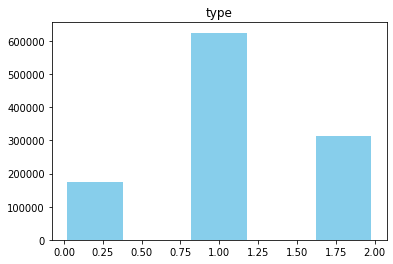

In [181]:
# описательная статистика для треx видов данных
all_data.hist (column='type', bins= 5 , grid= False , rwidth= .9 , color='skyblue')

In [182]:
# из гистограммы выше видно, что наиболее распространенный тип потока - mirai

In [183]:
# выделение столбцов с типом из выборок
y_train = train_data['type'].copy(deep=True)
train_data.drop('type', axis= 1 , inplace= True )

y_test = test_data['type'].copy(deep=True)
test_data.drop('type', axis= 1 , inplace= True )

In [184]:
# создание классификатора
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

# создание модели с использованием случайного леса
multi_task_model = MultiOutputClassifier(RandomForestClassifier())

In [185]:
y_train = pd.get_dummies(y_train).astype(int)
y_train.head()

,0,1,2
7405,0,1,0
28681,0,1,0
89159,1,0,0
81965,0,1,0
35443,0,0,1


In [186]:
# обучение модели
import time
start_time = time.time()
multi_task_model.fit(train_data, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 662.4795794487 seconds ---


In [187]:
start_time = time.time()
predictions = multi_task_model.predict(test_data)
print("--- %s seconds ---" % (time.time() - start_time))

--- 11.095364809036255 seconds ---


In [188]:
def back_to_ordinal(df):
    if df[0] == 1:
        return '0'
    if df[1] == 1:
        return '1'
    if df[2] == 1:
        return '2'
    
predictions_pd = pd.DataFrame(data=predictions)

In [189]:
predictions_pd['type'] = predictions_pd.apply(back_to_ordinal, axis=1)
predictions_pd.head()

,0,1,2,type
0,0,1,0,1
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,0,1


In [190]:
# в файл вывода предсказанные значения 
predicted = predictions_pd['type'].copy(deep=True)

output = pd.DataFrame({'Predictions': predicted})
output.to_csv('submission.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


In [191]:
print(len(predicted) == len(y_test))

True


In [192]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    1
1    1
2    1
3    1
4    1
Name: type, dtype: int64

In [193]:
predicted = pd.read_csv("submission.csv")
predicted.head()

,Predictions
0,1
1,1
2,1
3,1
4,1


In [194]:
compare = pd.DataFrame({"predictions": predicted['Predictions'], "given": y_test})
compare.head()

,predictions,given
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [195]:
print(list(compare.columns))
print(compare.dtypes)

['predictions', 'given']
predictions    int64
given          int64
dtype: object


In [196]:
def is_similar(df):
    if df['predictions'] == df['given']:
        return 1
    else:
        return 0

# compare = compare.astype(dtype={'predictions': np.int32, 'given': np.int32})
compare["similar"] = compare.apply(is_similar, axis=1)
compare.head(n=20)

,predictions,given,similar
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
5,1,1,1
6,0,0,1
7,1,1,1
8,1,1,1
9,0,0,1


array([[<Axes: title={'center': 'similar'}>]], dtype=object)

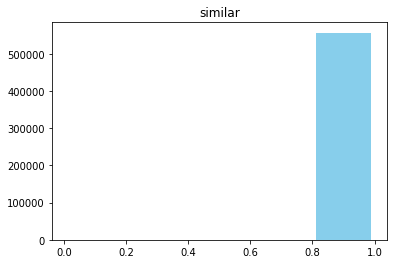

In [197]:
compare.hist(column='similar', bins= 5 , grid= False , rwidth= .9 , color='skyblue')